# 第4章

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

### CSVファイルを読みこむ

In [2]:
# CSVファイルを詠みこむ
dau = pd.read_csv("../Data/section4-dau.csv")
dau.head()

,log_date,app_name,user_id
0,2013-08-01,game-01,33754
1,2013-08-01,game-01,28598
2,2013-08-01,game-01,30306
3,2013-08-01,game-01,117
4,2013-08-01,game-01,6605


In [3]:
user_info = pd.read_csv("../Data/section4-user_info.csv")
user_info.head()

,install_date,app_name,user_id,gender,generation,device_type
0,2013-04-15,game-01,1,M,40,iOS
1,2013-04-15,game-01,2,M,10,Android
2,2013-04-15,game-01,3,F,40,iOS
3,2013-04-15,game-01,4,M,10,Android
4,2013-04-15,game-01,5,M,40,iOS


### DAUのデータにuser_infoデータをくっつける

In [4]:
# DAUにuser_infoをくっつける
dau_user_info = pd.merge(dau, user_info, on = ["user_id", "app_name"], how = "outer")
dau_user_info.head()

,log_date,app_name,user_id,install_date,gender,generation,device_type
0,2013-08-01,game-01,33754,2013-08-01,M,20,iOS
1,2013-08-02,game-01,33754,2013-08-01,M,20,iOS
2,2013-08-01,game-01,28598,2013-07-16,M,50,iOS
3,2013-08-04,game-01,28598,2013-07-16,M,50,iOS
4,2013-08-12,game-01,28598,2013-07-16,M,50,iOS


### セグメント分析（性別で集計）

In [5]:
# 月のカラムを追加
dau_user_info["log_month"] = dau_user_info["log_date"].str.slice(0, 7)
pd.pivot_table(dau_user_info, index = "log_month", columns = "gender", values = "user_id", aggfunc = len)

gender,F,M
log_month,,
2013-08,47343,46842
2013-09,38027,38148


### セグメント分析（年代で集計）

In [6]:
pd.pivot_table(dau_user_info, index = "log_month", columns = "generation", values = "user_id", aggfunc = len)

generation,10,20,30,40,50
log_month,,,,,
2013-08,18785,33671,28072,8828,4829
2013-09,15391,27229,22226,7494,3835


### セグメント分析（性別×年代で集計）

In [7]:
pd.pivot_table(dau_user_info, index = "log_month", columns = ["gender", "generation"], values = "user_id", aggfunc = len)

gender         F                               M                          
generation    10     20     30    40    50    10     20     30    40    50
log_month                                                                 
2013-08     9091  17181  14217  4597  2257  9694  16490  13855  4231  2572
2013-09     7316  13616  11458  3856  1781  8075  13613  10768  3638  2054

### セグメント分析（デバイスごとで集計）

In [8]:
pd.pivot_table(dau_user_info, index = "log_month", columns = "device_type", values = "user_id", aggfunc = len)

device_type,Android,iOS
log_month,,
2013-08,46974,47211
2013-09,29647,46528


### セグメント分析の結果を可視化する

In [9]:
# 日付別デバイス別にユーザ数を算出する
dau_user_info_device_summary = dau_user_info[["user_id", "log_date", "device_type"]].drop_duplicates().groupby(["log_date", "device_type"]).count().reset_index()
dau_user_info_device_summary.columns = ["log_date", "device_type", "dau"]

# 日付型に変換
dau_user_info_device_summary["log_date"] = pd.to_datetime(dau_user_info_device_summary["log_date"])
dau_user_info_device_summary.head()

,log_date,device_type,dau
0,2013-08-01,Android,1784
1,2013-08-01,iOS,1805
2,2013-08-02,Android,1386
3,2013-08-02,iOS,1451
4,2013-08-03,Android,1295


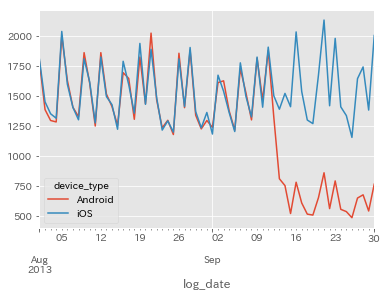

In [10]:
# 時系列のトレンドグラフの描画
dau_user_info_device_summary.groupby(["log_date", "device_type"])["dau"].max().unstack().plot()